# CAR PRICE PREDICTION PROJECT 

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing all necessary Libraries

## Importing dataset

In [2]:
#Import the dataset

df= pd.read_excel("Used_Car_Data.xlsx")
df

,Brand_Name,Model_Name,Manufacturing_Year,Driven_Kilometer,Fuel_Type,Owners,Monthly_EMIS,Car_Price,Location
0,2020 KIA SELTOS,HTK PLUS 1.5 PETROL Manual,2020,19355,Petrol,1st Owner,24997,1278599,Pune
1,2021 Nissan MAGNITE,XL Turbo CVT,2021,16049,Petrol,1st Owner,18600,951399,Pune
2,2016 Mercedes Benz CLA Class,CLA 200 CDI SPORT Automatic,2016,19670,Diesel,1st Owner,37986,1942999,Pune
3,2019 Maruti Ertiga,ZXI Plus SHVS Manual,2019,20233,Petrol,2nd Owner,19689,1007099,Pune
4,2018 Volkswagen Polo,COMFORTLINE 1.0 PETROL Manual,2018,21612,Petrol,1st Owner,11926,609999,Pune
...,...,...,...,...,...,...,...,...,...
6083,2021 Maruti Alto,LXI CNG Manual,2021,26369,Petrol + CNG,1st Owner,9881,505399,Ghaziabad
6084,2015 Audi Q3,30 TDI MT S EDITION Manual,2015,71423,Diesel,1st Owner,24934,1275399,Ghaziabad
6085,2015 Maruti Swift,LDI O Manual,2015,68858,Diesel,1st Owner,7028,359499,Ghaziabad
6086,2014 Maruti Swift,LDI BS IV Manual,2014,47537,Diesel,1st Owner,6387,326699,Ghaziabad


Importing the dataset and see all columns.

## Shape of data with number of rows and columns

In [3]:
df.shape

(6088, 9)

There are 6088 Rows and 10 Columns in dataset

## Detailed description

In [4]:
df.describe()

,Manufacturing_Year,Driven_Kilometer,Monthly_EMIS,Car_Price
count,6088.000000,6088.000000,6088.00000,6.088000e+03
mean,2017.248357,43475.389126,12886.42707,6.591460e+05
std,2.416759,31238.626480,6682.11745,3.417933e+05
min,2008.000000,1.000000,3466.00000,1.772990e+05
25%,2016.000000,20830.000000,8242.00000,4.215990e+05
50%,2018.000000,37981.500000,11015.00000,5.633990e+05
75%,2019.000000,60628.000000,15320.00000,7.835990e+05
max,2022.000000,400055.000000,64265.00000,3.287199e+06


- We can see the detailed description of all the rows and columns like count, mean value, standard deviation, minimum and maximum values.
- As we can see in monthly EMIs column minimum value is 3466 and 75% of all that column is 15320 but maximum value(100%) is very big i.e., 64265 as compare to all values so it will contains skewness

## Datatypes of all columns

In [5]:
#check the data types of all the columns
df.dtypes

Brand_Name            object
Model_Name            object
Manufacturing_Year     int64
Driven_Kilometer       int64
Fuel_Type             object
Owners                object
Monthly_EMIS           int64
Car_Price              int64
Location              object
dtype: object

- We have object(string) datatype --> Brand_Name, Model_Name, Fuel_type, Owners, Location
- Integer datatypes --> Manufacturing_Year, Driven_kilometer, Monthly_EMIS, Car_Price
- All are independent variable expect Car_Price
- Car_Price is a target variable


## Checking is there any null value in dataset

In [6]:
#check is there any null value present in any column

df.isnull().sum()

Brand_Name            0
Model_Name            0
Manufacturing_Year    0
Driven_Kilometer      0
Fuel_Type             0
Owners                0
Monthly_EMIS          0
Car_Price             0
Location              0
dtype: int64

There are no missing value in whole dataset.
As we see no null values present, now it's safe to preceed.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6088 entries, 0 to 6087
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand_Name          6088 non-null   object
 1   Model_Name          6088 non-null   object
 2   Manufacturing_Year  6088 non-null   int64 
 3   Driven_Kilometer    6088 non-null   int64 
 4   Fuel_Type           6088 non-null   object
 5   Owners              6088 non-null   object
 6   Monthly_EMIS        6088 non-null   int64 
 7   Car_Price           6088 non-null   int64 
 8   Location            6088 non-null   object
dtypes: int64(4), object(5)
memory usage: 428.2+ KB


We can see the complete information about data frame

## EDA (Exploratory Data Analysis)

### Visualization (Uni Variate analysis)
Uni variate analysis works with only one variable, hence it is called uni variate.

#### 1. Distplot

In [8]:
fe = df[['Manufacturing_Year', 'Driven_Kilometer', 'Monthly_EMIS', 'Car_Price']]

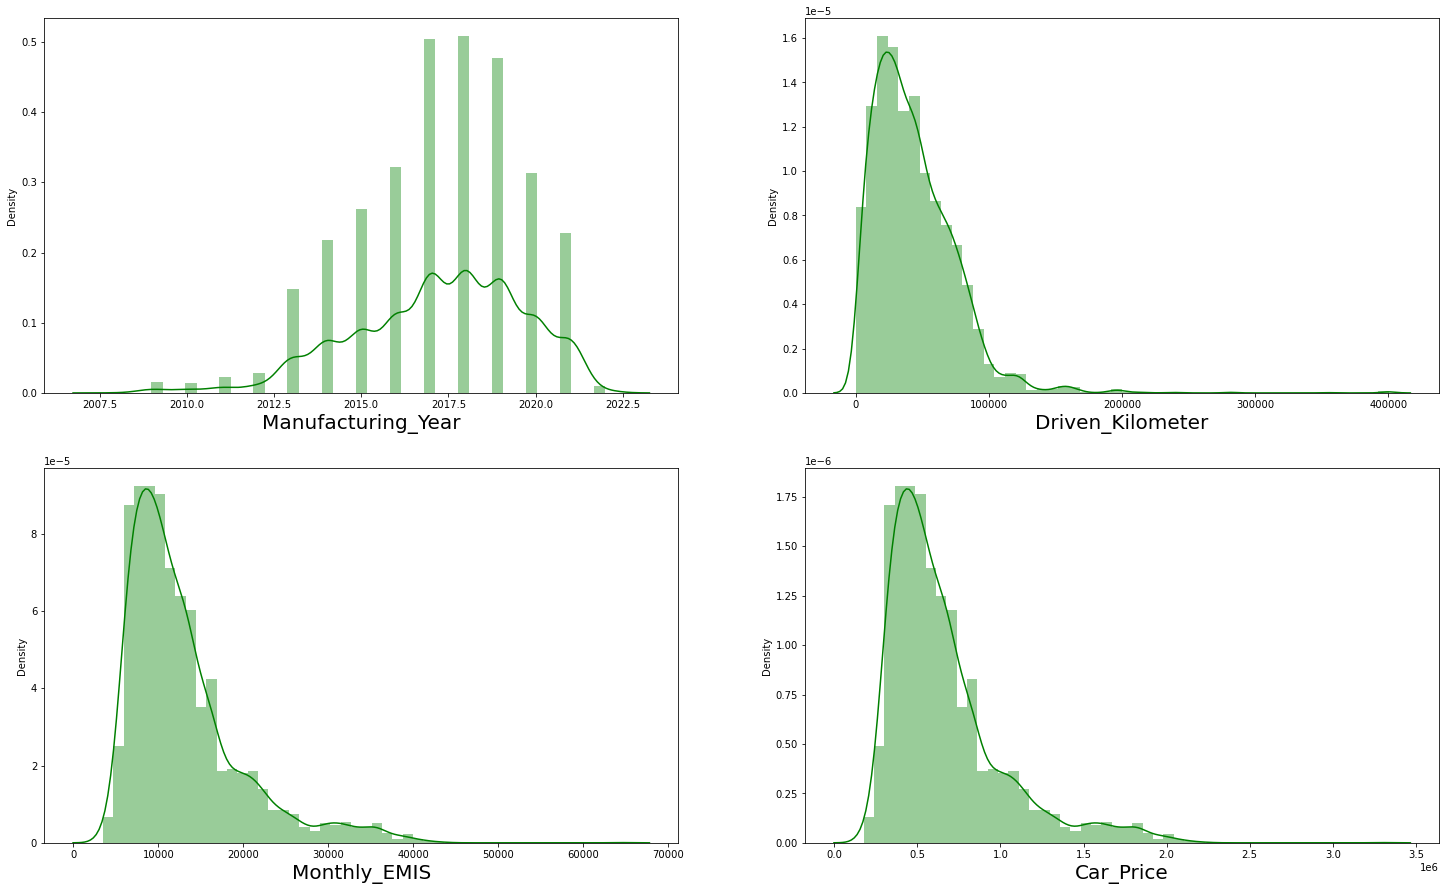

In [9]:
#Relationship Visualizing

plt.figure(figsize = (25,40), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 10: # as we see there are eight columns in the data
        plt.subplot(5,2,plotnumber)
        sns.distplot(fe[column], color = 'g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

'Driven_Kilometer', 'Monthly_EMIS', 'Car_Price' and 'Manufacturing_Year' are having skewness in it.

In [10]:
fe2 = df[['Brand_Name', 'Model_Name', 'Fuel_Type', 'Owners','Location']]

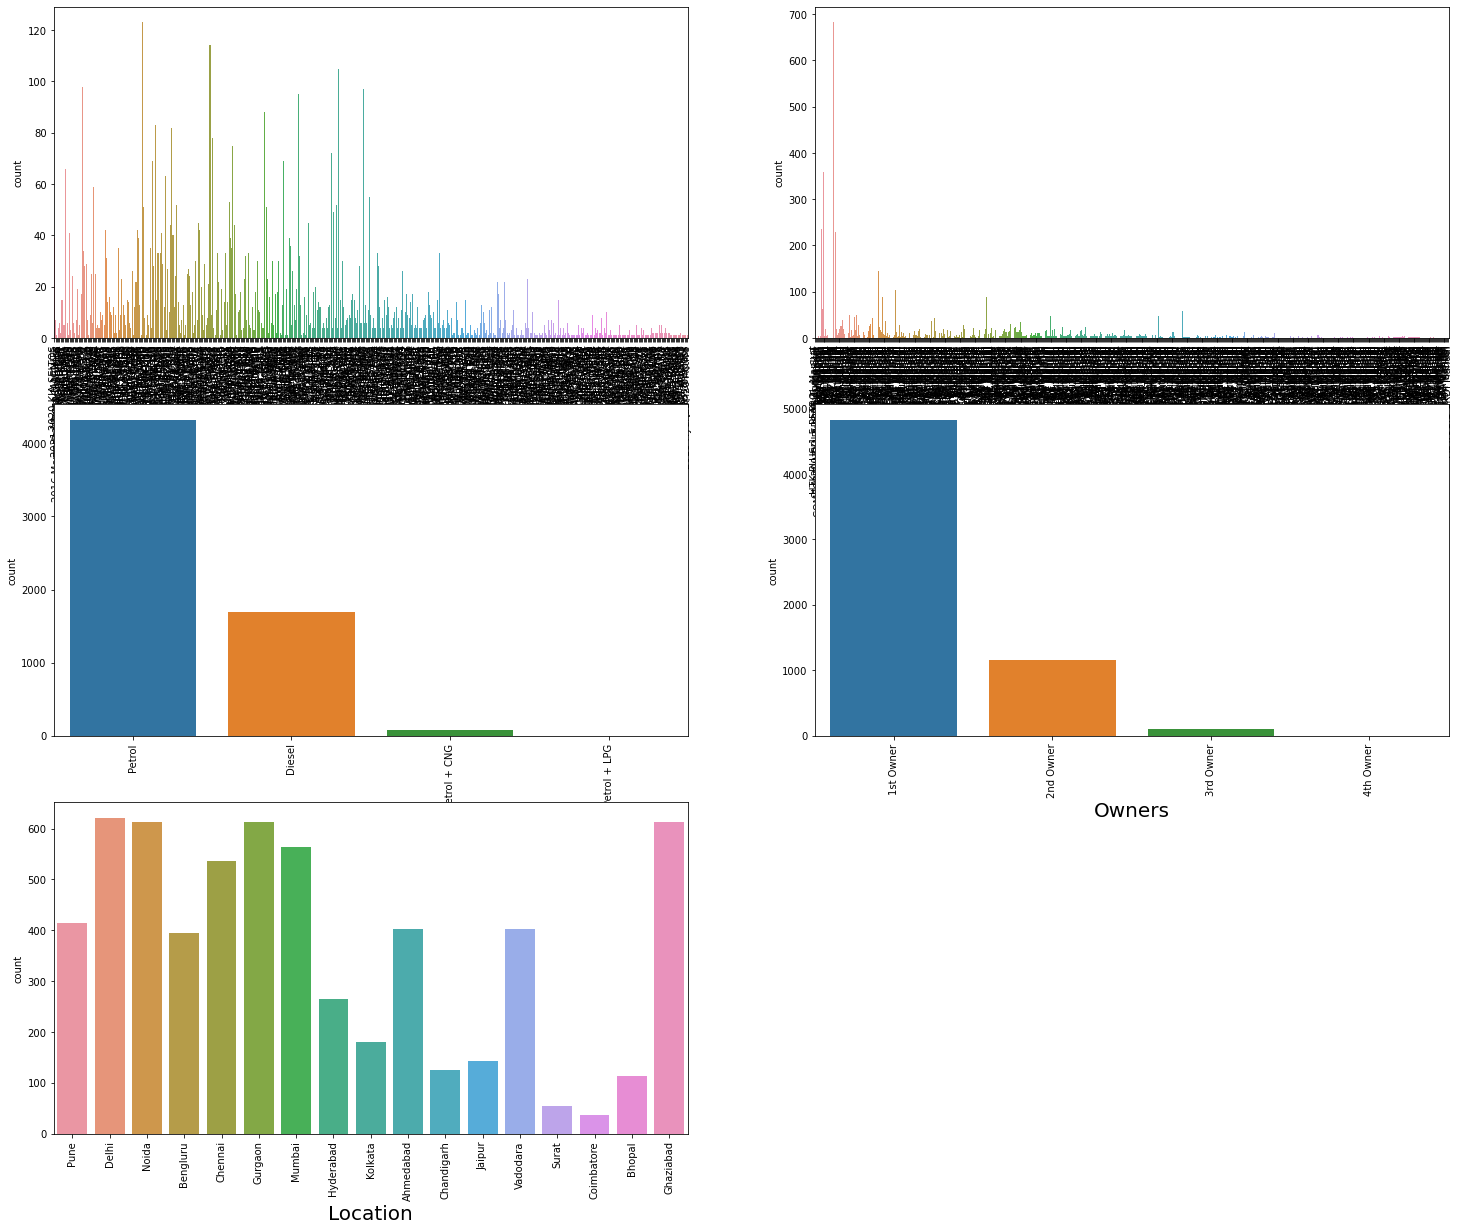

In [11]:
#Relationship Visualizing

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in fe2:
    if plotnumber <= 13: # as we see there are eight columns in the data
        plt.subplot(7,2,plotnumber)
        sns.countplot(fe2[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90)
        
    plotnumber += 1
plt.show()

- From the Fuel_Type plot, we can see that it has a high probability of petrol used cars because as we know petrol cars are less costly as compare to deisel cars and Petrol+CNG cars are having very less amount of cars and Petrol+LPG cars are having like no amount of cars.
- From Owners plot, we can see that most of the cars have 1st Owner and some of the cars have only 2nd and 3rd owner and no cars are having 4th owner.
- From Location plot, we can see that highest count is from Ghaziabad location and the lowest count is from Coimbatore location.
- From Brand_Name and Model_Name plots, we can see that there are lots of data in both of the columns.

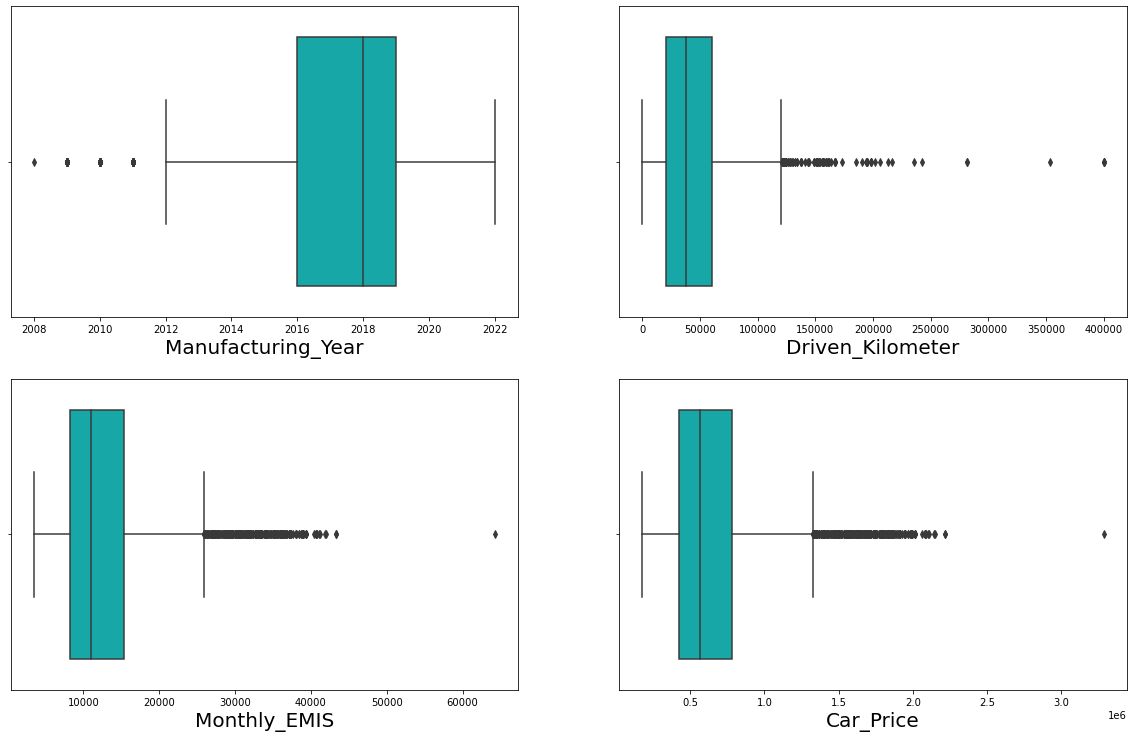

In [12]:
#Relationship Visualizing

plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in fe:
    if plotnumber <= 15: # as we see there are eight columns in the data
        plt.subplot(6,2,plotnumber)
        sns.boxplot(fe[column], color = 'c')
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

Manufacturing_Year, Monthly_EMIS and Driven_Kilometers contains outliers and Car_Price is a target variable.

## Bi variate analysis
Bi variate analysis is works with two variables.

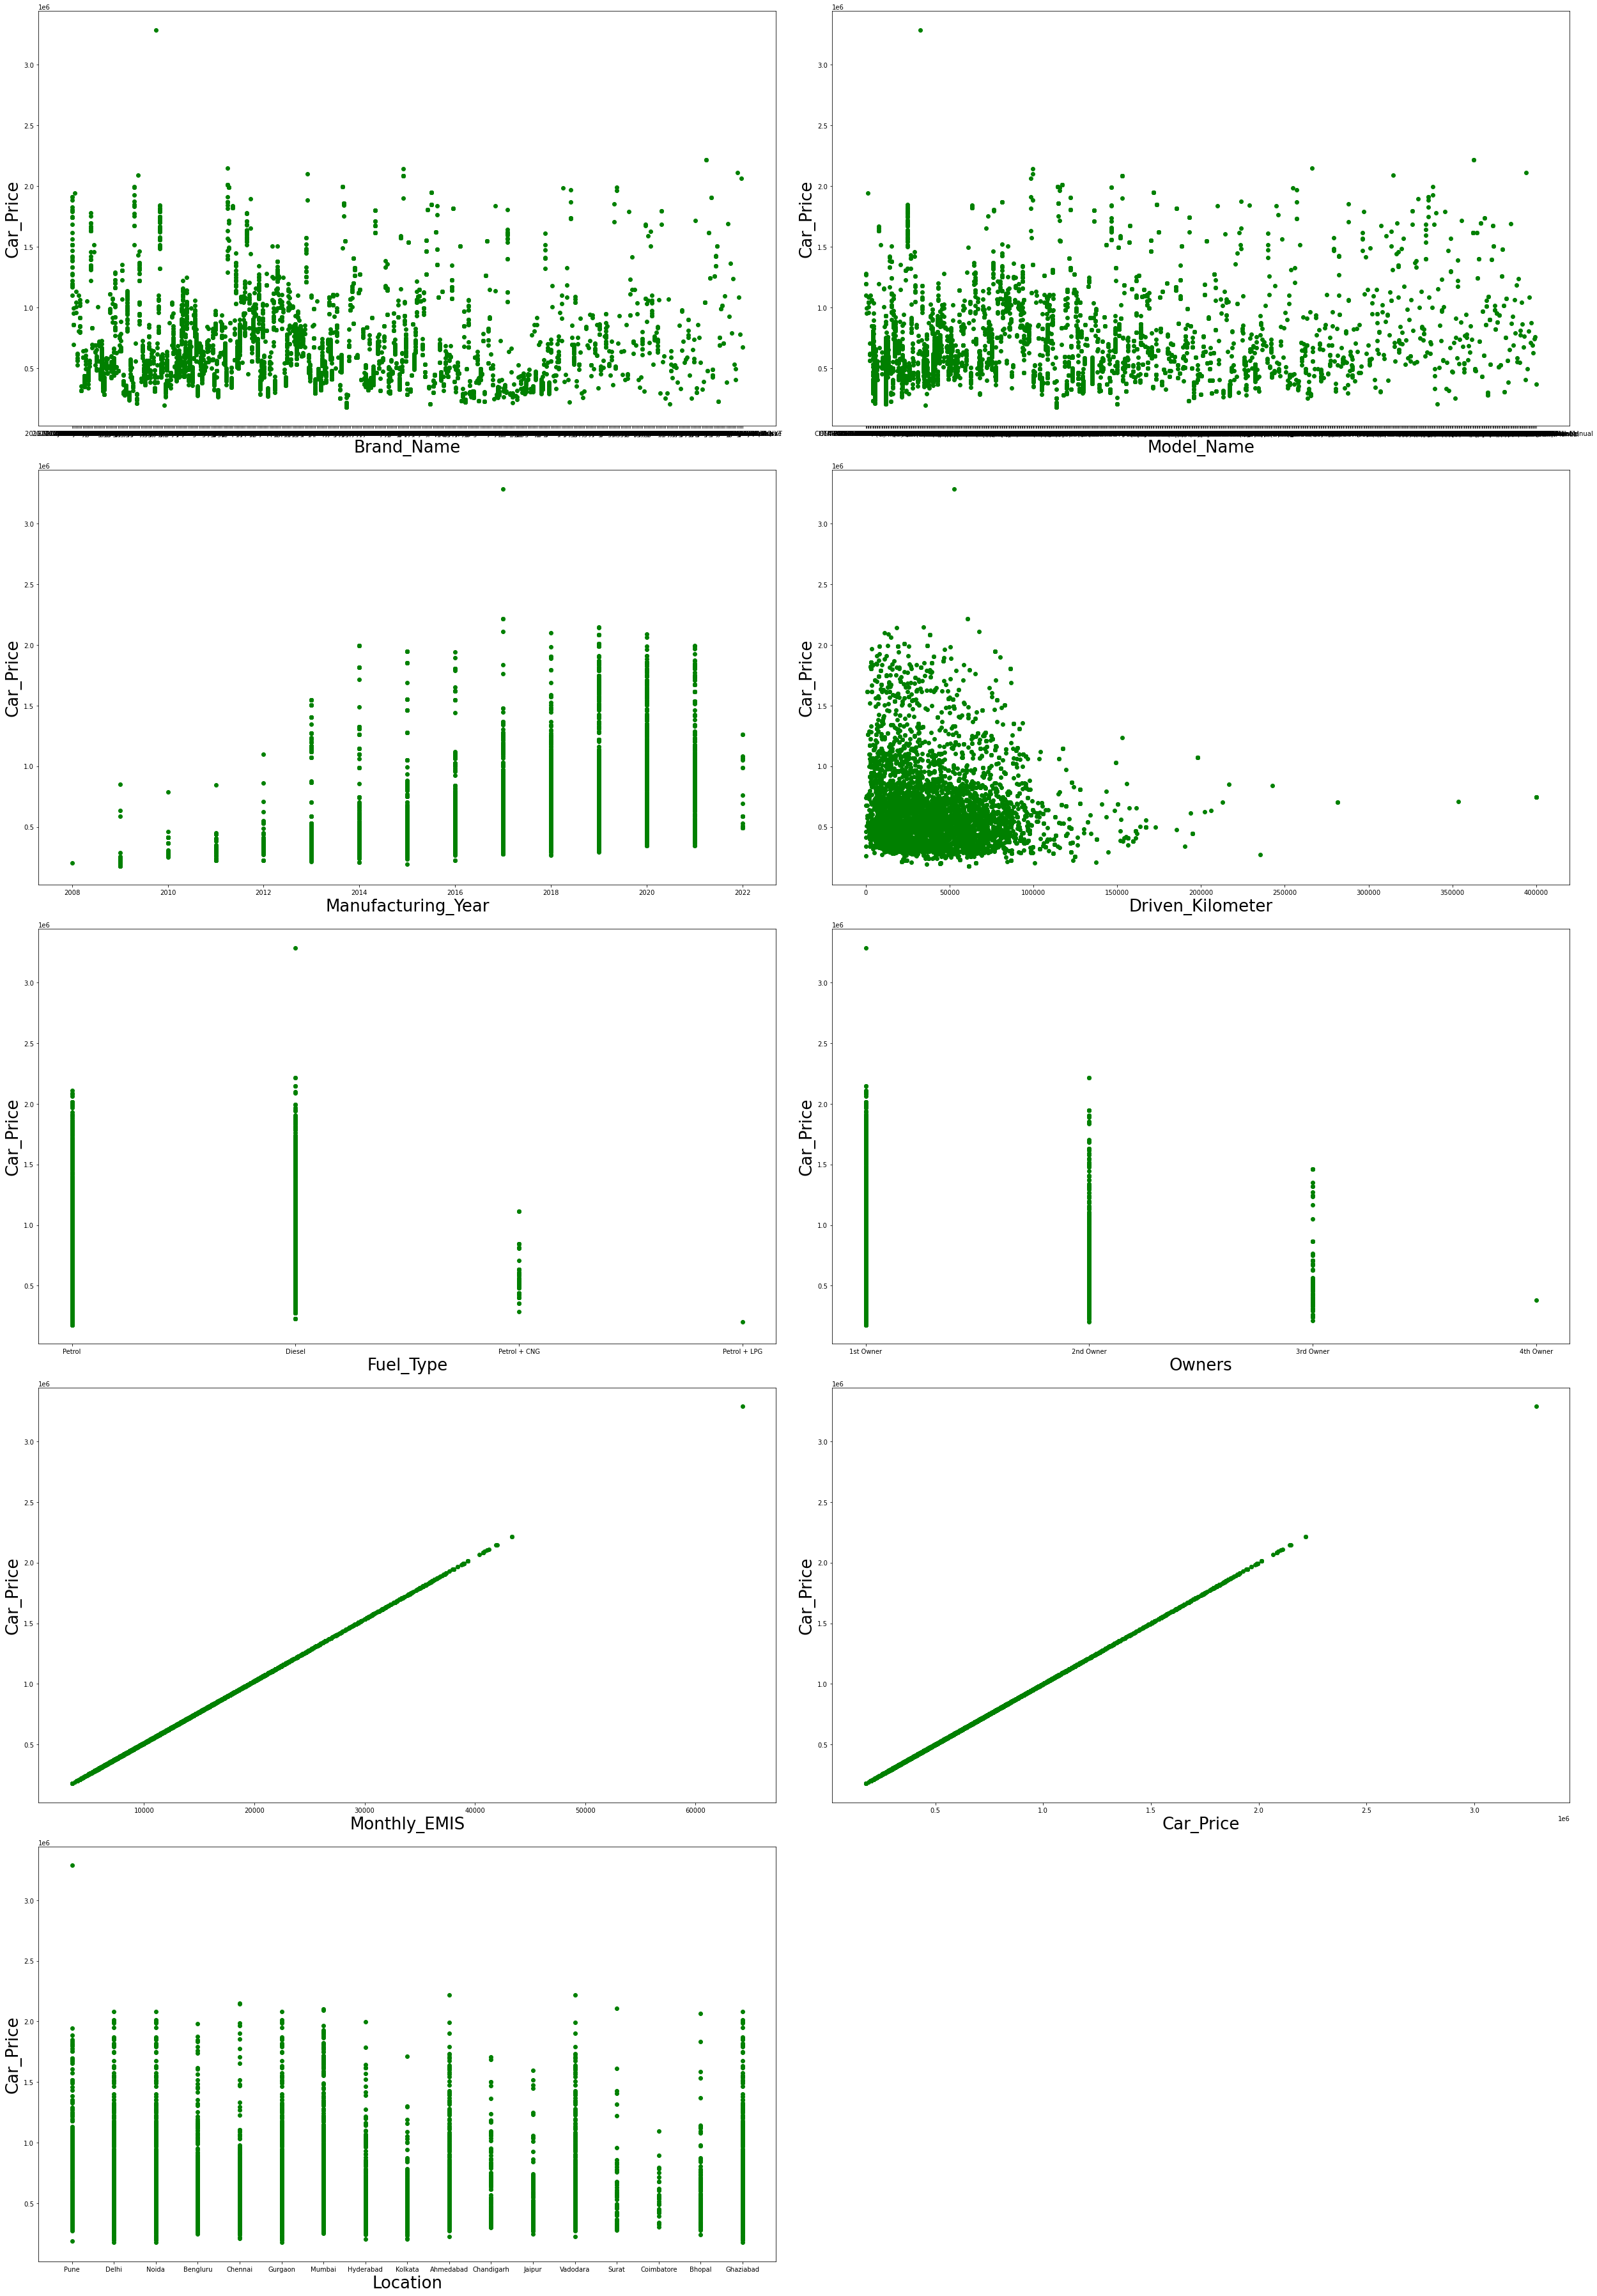

In [13]:
#Relationship Visualizing

plt.figure(figsize = (35,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <= 10:
        plt.subplot(5,2,plotnumber)
        plt.scatter(df[column],df['Car_Price'], color='g')
        plt.xlabel(column,fontsize=26)
        plt.ylabel('Car_Price', fontsize=26)
    plotnumber += 1
plt.tight_layout()

As we have seen there is Monthly Emis-that is having very linear relationship with target variable i.e., Car price. Outliers is also available in some columns

## Multi Variate analysis
Multi variate analysis find the relationship with all variables.
Now we will visualize the data and check the coiefficient of multicollinearity

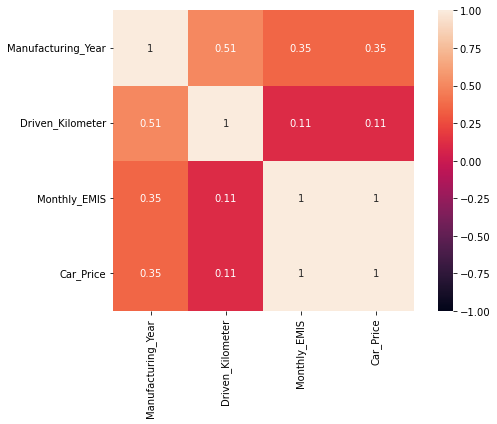

In [15]:
df_cor = df.corr().abs()

plt.figure(figsize = (8,6))
sns.heatmap(df_cor, vmin=-1, vmax= 1, annot=True, square=True)
plt.tight_layout()

Monthly EMI is completely correlated with target variable.

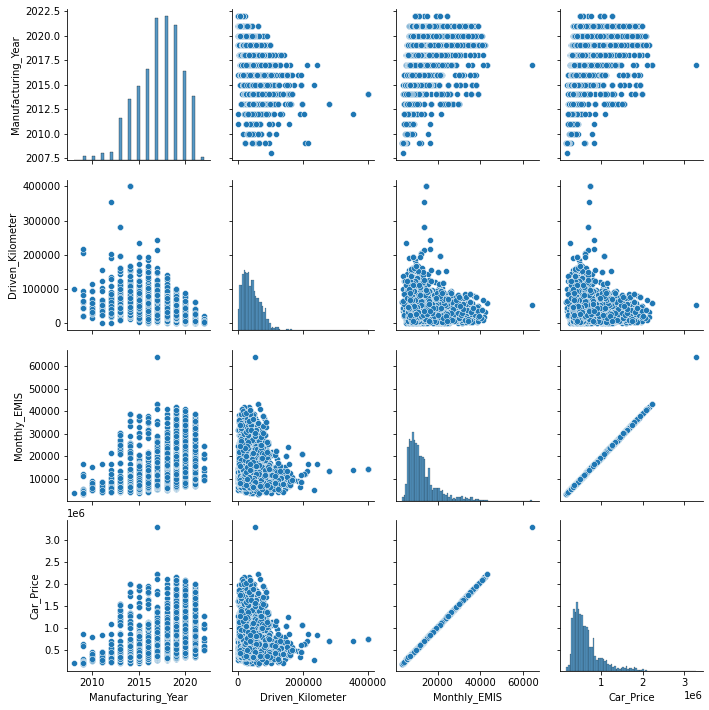

In [16]:
sns.pairplot(df)

The pairlot shows the relation of every columns with each other, are they linear or non linear in nature, outliers are present in it or not, and classes of categorical columns etc.

##### Find out which columns are positively and negatively correlated with each other

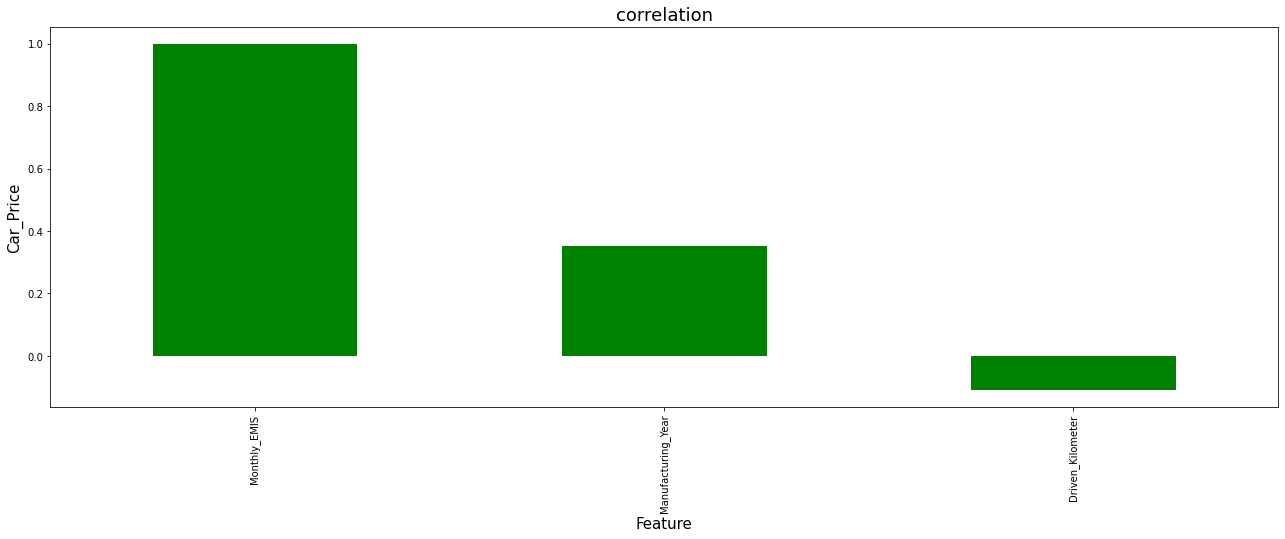

In [17]:
plt.figure(figsize=(22,7))
df.corr()['Car_Price'].sort_values(ascending = False).drop(['Car_Price']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Car_Price', fontsize = 15)
plt.title('correlation', fontsize = 18)
plt.show()

As shown in plot only driven_kilometer feature is negatively correlated with target variabl other than that all are  positively correlated with the target variable.

#### After visualization conclude that all input variables are having some/good amount relationship with target variable. Now proceed futher for next steps:

## Encoding

In [18]:
df

,Brand_Name,Model_Name,Manufacturing_Year,Driven_Kilometer,Fuel_Type,Owners,Monthly_EMIS,Car_Price,Location
0,2020 KIA SELTOS,HTK PLUS 1.5 PETROL Manual,2020,19355,Petrol,1st Owner,24997,1278599,Pune
1,2021 Nissan MAGNITE,XL Turbo CVT,2021,16049,Petrol,1st Owner,18600,951399,Pune
2,2016 Mercedes Benz CLA Class,CLA 200 CDI SPORT Automatic,2016,19670,Diesel,1st Owner,37986,1942999,Pune
3,2019 Maruti Ertiga,ZXI Plus SHVS Manual,2019,20233,Petrol,2nd Owner,19689,1007099,Pune
4,2018 Volkswagen Polo,COMFORTLINE 1.0 PETROL Manual,2018,21612,Petrol,1st Owner,11926,609999,Pune
...,...,...,...,...,...,...,...,...,...
6083,2021 Maruti Alto,LXI CNG Manual,2021,26369,Petrol + CNG,1st Owner,9881,505399,Ghaziabad
6084,2015 Audi Q3,30 TDI MT S EDITION Manual,2015,71423,Diesel,1st Owner,24934,1275399,Ghaziabad
6085,2015 Maruti Swift,LDI O Manual,2015,68858,Diesel,1st Owner,7028,359499,Ghaziabad
6086,2014 Maruti Swift,LDI BS IV Manual,2014,47537,Diesel,1st Owner,6387,326699,Ghaziabad


#### 1. BRAND NAME

In [19]:
df['Brand_Name'].unique()

array(['2020 KIA SELTOS', '2021 Nissan MAGNITE',
       '2016 Mercedes Benz CLA Class', '2019 Maruti Ertiga',
       '2018 Volkswagen Polo', '2021 Toyota URBAN CRUISER',
       '2021 Renault Kiger', '2011 Maruti Swift', '2014 Maruti Ertiga',
       '2020 Maruti Alto', '2020 Tata Tiago', '2022 Renault Kiger',
       '2015 Hyundai Grand i10', '2014 Volkswagen Polo',
       '2020 Hyundai Creta', '2021 Tata TIGOR', '2021 Hyundai Creta',
       '2021 Tata Tiago', '2020 Maruti New Wagon-R',
       '2016 Mahindra XUV500', '2017 Volkswagen Polo',
       '2017 Maruti Celerio', '2016 Maruti Baleno',
       '2015 Maruti Wagon R 1.0', '2014 Maruti Wagon R 1.0',
       '2019 Maruti New Wagon-R', '2020 Maruti Celerio',
       '2022 Datsun Redi Go', '2021 Honda Jazz', '2021 Renault Kwid',
       '2019 Maruti S Cross', '2017 Maruti Swift', '2021 Hyundai VENUE',
       '2016 Volkswagen Polo', '2014 Toyota Etios', '2020 Honda Amaze',
       '2021 Maruti Swift', '2020 KIA SONET', '2012 Hyundai i20',
    

In [20]:
df['Brand_Name'].value_counts()

2018 Maruti Alto 800        123
2017 Maruti Baleno          114
2015 Maruti Swift           105
2016 Maruti Baleno           98
2014 Maruti Swift            97
                           ... 
2022 Maruti Baleno            1
2016 Datsun Go                1
2013 Maruti Zen Estilo        1
2014 Hyundai Santro Xing      1
2018 Hyundai i20 Active       1
Name: Brand_Name, Length: 497, dtype: int64

Number of count of each unique value.

In [21]:
#import label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2. MODEL NAME

In [22]:
df['Model_Name'].unique()

array(['HTK PLUS 1.5 PETROL Manual', 'XL Turbo CVT',
       'CLA 200 CDI SPORT Automatic', 'ZXI Plus SHVS Manual',
       'COMFORTLINE 1.0 PETROL Manual', 'PREMIUM MT',
       'RXZ AMT 1.0 DUAL TONE', 'VDI Manual', 'ZXI Manual', 'LXI Manual',
       'XZ+ 1.2 Revotron Manual', 'ASTA 1.2 KAPPA VTVT Manual',
       'HIGHLINE1.2L PETROL Manual', '1.6 SX AT CRDI Automatic',
       'Revotron XE Manual', 'SX EXECUTIVE MT Manual',
       'XT 1.2 REVOTRON Manual', 'VXI 1.2L Manual', 'W6 4X2 Manual',
       'RXZ 1.0 MT', 'VXI Manual', 'RXL EASY R 1.0 L',
       'DELTA 1.2 K12 Manual', 'ZXI 1.2 Manual',
       'HTK PLUS 1.5 DIESEL Manual', 'T (O) Manual', 'ZX CVT Automatic',
       '1.0 RXT Opt Manual', 'ALPHA SHVS Manual', 'VDI OPT Manual',
       'S MT 1.2 KAPPA Manual', 'GT TSI 1.2 PETROL AT Automatic',
       'CROSS 1.5 V Manual', '1.2 SMT I VTEC Manual', 'ZXI AMT Automatic',
       'GTX PLUS DCT 1.0', 'MAGNA O 1.2 Manual', 'VXI AMT Automatic',
       'EX 1.6 VTVT AT Automatic', 'XZ 1.2 REVOT

In [23]:
df['Model_Name'].value_counts()

VXI Manual                      682
LXI Manual                      359
VDI Manual                      235
DELTA 1.2 K12 Manual            229
SPORTZ 1.2 KAPPA VTVT Manual    145
                               ... 
E MT 1.2 KAPPA Manual             1
PREMIUM DUAL TONE AT              1
2.4 GDI AT Automatic              1
EDITION C Automatic               1
ASTA 1.1 CRDI Manual              1
Name: Model_Name, Length: 676, dtype: int64

#### 3. FUEL TYPE column

In [27]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'Petrol + CNG'], dtype=object)

In [24]:
df['Fuel_Type'].value_counts()

Petrol          4317
Diesel          1695
Petrol + CNG      75
Petrol + LPG       1
Name: Fuel_Type, dtype: int64

#### 4. OWNERS 

In [25]:
df['Owners'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', '4th Owner'], dtype=object)

In [26]:
df['Owners'].value_counts()

1st Owner    4822
2nd Owner    1162
3rd Owner     103
4th Owner       1
Name: Owners, dtype: int64

In [27]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [28]:
#after encoding and droping some columns the dataframe will look
df

,Brand_Name,Model_Name,Manufacturing_Year,Driven_Kilometer,Fuel_Type,Owners,Monthly_EMIS,Car_Price,Location
0,401,329,2020,19355,1,0,24997,1278599,14
1,468,591,2021,16049,1,0,18600,951399,14
2,194,244,2016,19670,0,0,37986,1942999,14
3,360,667,2019,20233,1,1,19689,1007099,14
4,322,247,2018,21612,1,0,11926,609999,14
...,...,...,...,...,...,...,...,...,...
6083,455,359,2021,26369,2,0,9881,505399,7
6084,117,185,2015,71423,0,0,24934,1275399,7
6085,144,346,2015,68858,0,0,7028,359499,7
6086,103,344,2014,47537,0,0,6387,326699,7


## Remove outliers 
Now we found the outliers and skewness in some variables.Removing outliers first.

In [29]:
df.dtypes

Brand_Name            int32
Model_Name            int32
Manufacturing_Year    int64
Driven_Kilometer      int64
Fuel_Type             int32
Owners                int32
Monthly_EMIS          int64
Car_Price             int64
Location              int32
dtype: object

## 1.Outlier removal using Zscore

In [30]:
#In Zscore technique taking standard deviation 3
#for Zscore outlier removal technique import library from scipy

from scipy.stats import zscore

z_score= zscore(df[['Driven_Kilometer', 'Monthly_EMIS']])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

new_df = df[filtering_entry]

print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", new_df.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-new_df.shape[0])/df.shape[0])

shape before and after
shape before         : (6088, 9)
shape after          : (5876, 9)
Percentage Loss      : 0.03482260183968462


3.48% data will loss after applying Zscore technique.

In [31]:
5876/6088

0.9651773981603153

96.51% data remains after aplying zscore technique.

In [32]:
new_df.describe()

,Brand_Name,Model_Name,Manufacturing_Year,Driven_Kilometer,Fuel_Type,Owners,Monthly_EMIS,Car_Price,Location
count,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5.876000e+03,5876.000000
mean,259.698434,384.367937,2017.248809,42102.105174,0.745575,0.227195,12334.350408,6.309070e+05,8.163887
std,118.825267,191.670276,2.398306,26426.279947,0.465057,0.459731,5652.895423,2.891484e+05,4.700334
min,0.000000,0.000000,2008.000000,1.000000,0.000000,0.000000,3466.000000,1.772990e+05,0.000000
25%,171.000000,231.750000,2016.000000,21003.500000,0.000000,0.000000,8206.500000,4.197740e+05,4.000000
50%,264.000000,406.500000,2017.000000,37797.500000,1.000000,0.000000,10895.000000,5.572990e+05,8.000000
75%,352.250000,561.000000,2019.000000,59958.000000,1.000000,0.000000,14870.000000,7.606090e+05,12.000000
max,496.000000,675.000000,2022.000000,134186.000000,3.000000,3.000000,32926.000000,1.684199e+06,16.000000


## Check the skewness and remove that

In [33]:
new_df.skew()

Brand_Name           -0.089595
Model_Name           -0.399417
Manufacturing_Year   -0.575758
Driven_Kilometer      0.694431
Fuel_Type            -0.715034
Owners                1.850115
Monthly_EMIS          1.285179
Car_Price             1.285179
Location             -0.092446
dtype: float64

As we see there are some variables are skewed, whoes value is not lies between -0.5 to +0.5 this range. in this dataset Monthly_EMIS, Driver_kilometer are having skewness in it because other columns are categorical in nature

## Apply yeo-johnson method to remove skewness

In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [34]:
#applying log transformation on skewed columns
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')


new_df['Driven_Kilometer'] = scaler.fit_transform(new_df['Driven_Kilometer'].values.reshape(-1,1))
new_df['Monthly_EMIS'] = scaler.fit_transform(new_df['Monthly_EMIS'].values.reshape(-1,1))


after applying log transformation visualize the output of log transformation

<AxesSubplot:xlabel='Driven_Kilometer', ylabel='Density'>

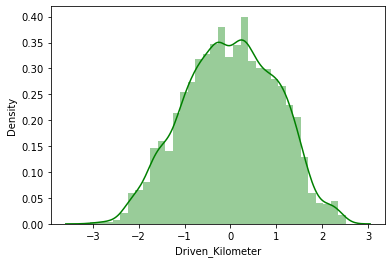

In [35]:
sns.distplot(new_df["Driven_Kilometer"], color = 'g')     

<AxesSubplot:xlabel='Monthly_EMIS', ylabel='Density'>

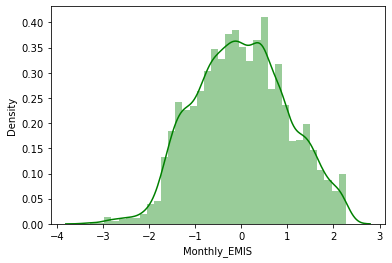

In [36]:
sns.distplot(new_df["Monthly_EMIS"], color = 'g')     

In [37]:
new_df.skew()

Brand_Name           -0.089595
Model_Name           -0.399417
Manufacturing_Year   -0.575758
Driven_Kilometer     -0.077123
Fuel_Type            -0.715034
Owners                1.850115
Monthly_EMIS          0.019139
Car_Price             1.285179
Location             -0.092446
dtype: float64

After using power transformation we can see the skewness of all columns are removed.

## Seperating the columns into featuers and target:

#### x= features, y=Target 

In [38]:
x = new_df.drop(columns = 'Car_Price', axis=1)
y = new_df['Car_Price']

## Scalling technique

In [39]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_scalar = ss.fit_transform(x)

variables are scaled now using standard scaler technique.

## Variance inflation factor

In [40]:
#import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,33.319588,Brand_Name
1,1.114687,Model_Name
2,32.788479,Manufacturing_Year
3,1.693962,Driven_Kilometer
4,1.393725,Fuel_Type
5,1.045309,Owners
6,1.548699,Monthly_EMIS
7,1.010386,Location


as we have saw in the table vif value is greater than 5 in only two columns but that columns are important so that we are unable to drop tat columns.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding best random state 

In [42]:
from sklearn.tree import DecisionTreeRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc= r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "on Random_state ", maxRS)

Best accuracy is  0.9999952343977322 on Random_state  126


In [43]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.3, random_state = 126)

# 1.Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression

Lr=LinearRegression()
Lr.fit(x_train, y_train)

LinearRegression()

In [45]:
pred_test=Lr.predict(x_test)

In [46]:
print(r2_score(y_test,pred_test))

0.9056277467948596


## Cross Validation of Linear Regression 

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

cv_score= cross_val_score(Lr, x, y, cv=5, scoring='r2')
cv_mean=cv_score.mean()
cv_mean

0.9014025033270915

## Regularization 

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters = {'alpha' :[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [49]:
ls = Lasso(alpha = 0.0001, random_state=0)
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)

laso = r2_score(y_test, pred_ls)
laso

0.9056277467400545

In [50]:
cv_score= cross_val_score(ls, x, y, cv=5, scoring='r2')
cv_mean=cv_score.mean()
cv_mean

0.9014025033401445

- The r2 score for linear regression model is : 90.56%
- Cross validation score for linear regression model is : 90.14%

# 2.Random Forest Regression 

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse', 'mae'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestRegressor()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [52]:
Rfr =RandomForestRegressor(criterion = "mae", max_features="auto")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = r2_score(y_test,pred_decision)
print('R2 Score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

R2 Score:  99.99971118754321
Cross Val Score:  99.99938900408837


- The r2 score for Random Forest Regressor model is : 99.999%
- Cross validation score for Random Forest Regressor is : 99.999%

## 3.Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
pred_dtree = dtree.predict(x_test)
print(r2_score(y_test,pred_dtree))

0.9999950380311774


In [55]:
cv_score= cross_val_score(dtree, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.9999916079539986

- The r2 score for Decision tree regression model is : 99.999%
- Cross validation score for Decision tree regression is : 99.999% 

## Compare all models

The diffrence between r2 score and cross validation score of linear regression model is : 0.42%

The diffrence between r2 score and cross validation score Random Forest Regressor model is : 0.00032%

The diffrence between r2 score and cross validation score of Decision Tree Regressor model is : 0.0003%

### So, best model is Decision Tree Regressor.

## Hyper parameter tunning

In [56]:
# Decision tree Regressor
Parameters = {'max_depth': [2, 3, 5, 10, 20, 50],
              'min_samples_leaf': [1, 10, 20, 50, 100],
              'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              'splitter' : ["best", "random"]
             }

In [57]:
GCV=GridSearchCV(DecisionTreeRegressor(),Parameters,cv=5)

In [58]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 5, 10, 20, 50],
                         'min_samples_leaf': [1, 10, 20, 50, 100],
                         'splitter': ['best', 'random']})

In [59]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [60]:
mod = DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 50, min_samples_leaf= 1, splitter='best')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(r2_score(y_test, pred)*100)

99.99941023950007


### after hyperparameter tuning the r2 score is remains good: 99.999%

## Boosting model

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [62]:
GBR.fit(x_train, y_train)
y_pred = GBR.predict(x_train)

In [63]:
from sklearn import metrics
print('r2 score', metrics.r2_score(y_train, y_pred))

r2 score 0.9999372285681543


## Saving the model

In [64]:
import joblib
joblib.dump(mod,"CarPricePrediction.pkl")

['CarPricePrediction.pkl']

## Loading the model

In [65]:
model = joblib.load("CarPricePrediction.pkl")

In [66]:
prediction = model.predict(x_test)

In [67]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [68]:
prediction.to_csv('CarPricePredictionResults.csv', index = False)
#prediction saving

Model saved

# Conclusion

- After the completion of this project we got an insight on how to collect data, pre-processing the data, analysing the data and building a model.

- First we collected the used cars data from different websites like olx, cardekho, cars24, ola etc and it was done by using Web Scraping. The framework used for web scraping was Beautiful Soup and Selenium, which has an advantage of automating our process of collecting data.

- We collected almost 5000+ data which contained the selling price and other related features of used cars.

- Then the scrapped data was combined in a single data frame and saved in a excel file so that we can open it and analyse the data.

- We did data cleaning, data-preprocessing steps like finding and handling null values, removing words from numbers, converting object to int type, data visualization, handling outliers and skewness etc.

- After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model.

- We found that Decision Tree Regressor Algorithm was performing well according to their r2_score and cross validation scores.

- Then we performed Hyperparameter Tuning technique using GridSearchCV for getting the best parameters.

- We saved the final model in pkl format using the joblib library after getting a dataframe of predicted and actual used car price details.